In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.035
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[224.58622278 151.5256873  141.14548371 ... 200.49625639 141.43742807
  41.04874324]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[4.15222995e+01 1.47960104e-01 9.12583865e-02 7.04418651e-02
 6.02120026e-02 5.38842808e-02 5.09640393e-02 4.81996358e-02
 4.65841510e-02 4.53116294e-02 4.43412943e-02 4.35867491e-02
 4.31568261e-02 4.25603229e-02 4.24683811e-02 4.21592572e-02
 4.18699456e-02 4.17635506e-02 4.15704283e-02 4.14925739e-02]
[2.81286392e+01 7.05811298e-04 4.08098382e-04 3.06515701e-04
 2.71139358e-04 2.38010426e-04 2.25552383e-04 2.11984988e-04
 2.07981941e-04 2.00958109e-04 1.95283842e-04 1.92905824e-04
 1.92491714e-04 1.87803212e-04 1.90164501e-04 1.85894929e-04
 1.89526836e-04 1.89270728e-04 1.80417077e-04 1.87222815e-04]
[3.16053127e+01 7.08360677e-04 4.10810260e-04 3.10419209e-04
 2.67849784e-04 2.33383026e-04 2.29070541e-04 2.15327796e-04
 2.06608947e-04 1.97858921e-04 1.98609850e-04 1.95471066e-04
 1.87798568e-04 1.87275982e-04 1.86402371e-04 1.86171673e-04
 1.87477374e-04 1.86997948e-04 1.85870637e-04 1.81257945e-04]
[173.67884898   0.22725919   0.99044181   0.9962114    0.99752389
   0.99809719   

In [5]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/test.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.035/000/
True
(204,)


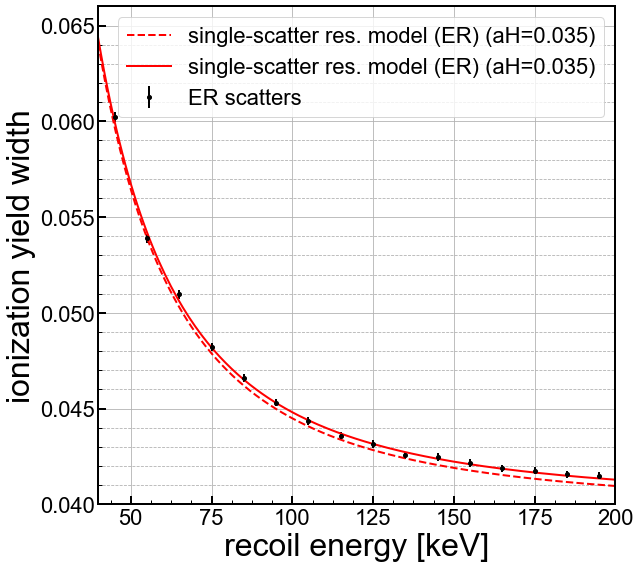

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()

In [7]:
#do this for NR singles as well
import observable_simulations as osim
import histogram_yield as hy

Q,Ernr,Q_ss,Ernr_ss = osim.simQEr('GGA3',V=V,aH=aH,C=C,highstats=True)
bindf,bindfE = hy.QEr_Ebin(Q_ss, Ernr_ss, bins=bins,silent=True)
qbootsigs_nr,qbootsigerrsl_nr,qbootsigerrsu_nr = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs_nr = hy.QEr_QbootBC(bindfE,qbootsigs_nr,xE,20,bins,silent=True)

print(qbootsigs_nr)
print(qbootsigerrsl_nr)
print(qbootsigerrsu_nr)
print(qbootcorrs_nr)

[4.83259966e+01 8.98796359e-02 5.30219079e-02 3.82252316e-02
 3.01955489e-02 2.50376121e-02 2.29966053e-02 1.98726677e-02
 1.99870619e-02 1.82668774e-02 1.70961767e-02 1.48252340e-02
 1.62123069e-02 1.54124250e-02 1.41069384e-02 1.34717342e-02
 1.46724664e-02 1.37718339e-02 1.25634678e-02 1.49116298e-02]
[2.97433270e+01 1.34546532e-03 1.08030087e-03 9.09535181e-04
 8.90523250e-04 8.66255933e-04 9.30131003e-04 9.26480449e-04
 1.12392919e-03 1.16359269e-03 1.26368930e-03 1.03869288e-03
 1.61395381e-03 1.50617690e-03 1.59604268e-03 2.03515437e-03
 2.51200670e-03 2.34607701e-03 3.25768770e-03 3.67119341e-03]
[3.16698393e+01 1.33777323e-03 1.06769577e-03 9.12105779e-04
 9.07924226e-04 8.50115717e-04 9.56847274e-04 9.58222544e-04
 1.16769502e-03 1.22866639e-03 1.29778479e-03 1.11876326e-03
 1.66740436e-03 1.62517447e-03 1.68349591e-03 2.02122874e-03
 2.66290627e-03 2.60916601e-03 3.83499397e-03 4.72347105e-03]
[2.55279170e+02 1.44175988e-01 9.60511635e-01 9.79491803e-01
 9.85103950e-01 9.874

In [8]:
#get the NR calculations for our yield band
Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR',alpha=(1/18.0))

#Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR')
print(np.shape(Enr))
print(signr[0])

GGA3/NR/4.0/5.556E-02/0.035/000/
True
(200,)
0.16121389987552073


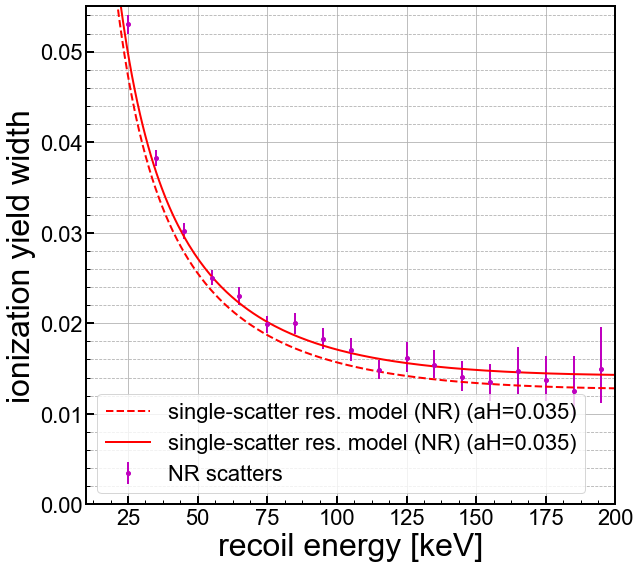

In [9]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs_nr, yerr=(qbootsigerrsl_nr,qbootsigerrsu_nr), \
         color='m', marker='o', markersize=4,linestyle='none',label='NR scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/figure.png')
plt.show()